In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

import sys
#from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

/Users/anmol/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/anmol/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/anmol/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/anmol/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

# Tensorflow Basics

In [2]:
#Tensors
3 # a rank 0 tensor; this is a scalar with shape []
[1. ,2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]

3

[1.0, 2.0, 3.0]

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

In [3]:
#A computational graph is a series of TensorFlow operations arranged into a graph of nodes. 

#TensorFlow Core programs consist of two discrete sections:
#1.	Building the computational graph.
#2.	Running the computational graph.

# Constants

In [4]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const:0", shape=(), dtype=float32) Tensor("Const_1:0", shape=(), dtype=float32)


In [5]:
#Notice that printing the nodes does not output the values 3.0 and 4.0 as you might expect. 
#Instead, they are nodes that, when evaluated, would produce 3.0 and 4.0, respectively. 
#To actually evaluate the nodes, we must run the computational graph within a session. 

sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


In [6]:
#more complicated computations
node3 = tf.add(node1, node2)
print("node3: ", node3)
print("sess.run(node3): ",sess.run(node3))

node3:  Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3):  7.0


# Placeholders

In [7]:
#A graph can be parameterized to accept external inputs, known as placeholders.
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

In [8]:
print(sess.run(adder_node, {a: 3, b:4.5}))
print(sess.run(adder_node, {a: [1,3], b: [2, 4]}))

7.5
[3. 7.]


In [9]:
#more complex computations
add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, {a: 3, b:4.5}))

22.5


# Variables

In [10]:
#In ML we typically want a model that can take arbitrary inputs.
#To make the model trainable, we need to be able to modify the graph to get new outputs with the same input. 
#Variables allow us to add trainable parameters to a graph. 

In [11]:
W = tf.Variable([.3], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W * x + b

In [12]:
#Constants are initialized when you call tf.constant, and their value can never change. 
#By contrast, variables are not initialized when you call tf.Variable. To initialize 
#all the variables in a TensorFlow program, you must explicitly call a special 
#operation as follows

In [13]:
init=tf.global_variables_initializer()
sess.run(tf.global_variables_initializer())
sess.run([W,b])

[array([0.3], dtype=float32), array([-0.3], dtype=float32)]

In [14]:
#Since x is a placeholder, we can evaluate linear_model 
#for several values of x simultaneously as follows
print(sess.run(linear_model, {x:[1,2,3,4]}))

[0.         0.3        0.6        0.90000004]


# How accurate is the model?

In [15]:
#We created a model. How good it is?
#To evaluate the model on training data, we need a y placeholder to provide the desired values, 
#and we need to write a loss function.

In [16]:
y = tf.placeholder(tf.float32)
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)
#tf.reduce_sum sums all the squared errors to create a single scalar 
sess.run([loss,b,W,linear_model,squared_deltas,y], {x:[1,2,3,4], y:[0,-1,-2,-3]})

[23.66,
 array([-0.3], dtype=float32),
 array([0.3], dtype=float32),
 array([0.        , 0.3       , 0.6       , 0.90000004], dtype=float32),
 array([ 0.       ,  1.6899998,  6.7599993, 15.210001 ], dtype=float32),
 array([ 0., -1., -2., -3.], dtype=float32)]

In [17]:
#let us improve the model manually
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
print(sess.run([b,W]))
sess.run([fixW, fixb])
print(sess.run(loss, {x:[1,2,3,4], y:[0,-1,-2,-3]}), sess.run(b), sess.run(W))

[array([-0.3], dtype=float32), array([0.3], dtype=float32)]


[array([-1.], dtype=float32), array([1.], dtype=float32)]

0.0 [1.] [-1.]


In [18]:
#Yay! we rightly guessed the values of W and b

# Learning our first TensorFlow model

In [19]:
%%time
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
sess.run(init) # reset values to incorrect defaults.
print(sess.run([W, b]))
for i in range(1000):
  sess.run(train, {x:[1,2,3,4], y:[0,-1,-2,-3]})
  if i%100==0:
    print("Iter", i, ":",sess.run([W, b]))

print(sess.run([W, b]))

[array([0.3], dtype=float32), array([-0.3], dtype=float32)]
Iter 0 : [array([-0.21999997], dtype=float32), array([-0.45600003], dtype=float32)]
Iter 100 : [array([-0.84270465], dtype=float32), array([0.5375326], dtype=float32)]
Iter 200 : [array([-0.9528499], dtype=float32), array([0.86137295], dtype=float32)]
Iter 300 : [array([-0.98586655], dtype=float32), array([0.95844597], dtype=float32)]
Iter 400 : [array([-0.9957634], dtype=float32), array([0.98754394], dtype=float32)]
Iter 500 : [array([-0.9987301], dtype=float32), array([0.9962665], dtype=float32)]
Iter 600 : [array([-0.99961936], dtype=float32), array([0.998881], dtype=float32)]
Iter 700 : [array([-0.9998859], dtype=float32), array([0.9996646], dtype=float32)]
Iter 800 : [array([-0.9999658], dtype=float32), array([0.99989945], dtype=float32)]
Iter 900 : [array([-0.9999897], dtype=float32), array([0.9999697], dtype=float32)]
[array([-0.9999969], dtype=float32), array([0.9999908], dtype=float32)]
CPU times: user 511 ms, sys: 45

# Complete Program -- Linear Regression Model

In [20]:
# Model parameters
#W = tf.Variable([.3], dtype=tf.float32)
W = tf.Variable([[.3, -0.4]], dtype=tf.float32)
b = tf.Variable([-.3], dtype=tf.float32)
# Model input and output
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

linear_model = tf.matmul(W,tf.transpose(x)) + b
#linear_model =W*x + b

# loss
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of the squares
# optimizer
optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(loss)
# training data
#x_train = [1,2,3,4]
x_train = [[1,2],[2,3],[3,4],[4,5]]
y_train = [0,-1,-2,-3]
# training loop
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init) 
for i in range(1000):
  sess.run(train, {x:x_train, y:y_train})

# evaluate training accuracy
curr_W, curr_b, curr_loss = sess.run([W, b, loss], {x:x_train, y:y_train})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))

W: [[-0.866666   -0.13333294]] b: [1.13333] loss: 5.2580162e-12


# Simple MLP with no hidden layer and 10 output neurons with softmax

In [21]:
!pip install -q git+https://github.com/tensorflow/examples.git

In [22]:
#you could also get data from the web, this way
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
tf.reset_default_graph()
dir="MNIST_data/"
# Import data
mnist = input_data.read_data_sets(dir, one_hot=True)
mnist.train.images.shape
mnist.train.labels.shape
mnist.test.images.shape
mnist.test.labels.shape

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

(55000, 784)

(55000, 10)

(10000, 784)

(10000, 10)

In [23]:
mnist.train.labels[0]
mnist.train.images[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

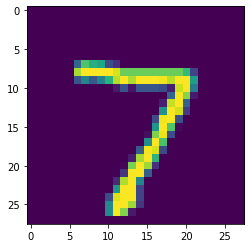

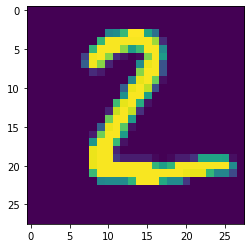

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
from matplotlib import pyplot as plt
import numpy as np
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d)
    return plt

gen_image(mnist.test.images[0]).show()
gen_image(mnist.test.images[1]).show()
print(mnist.test.labels[0], mnist.test.labels[1])

In [25]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

In [26]:
# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [27]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [28]:
%%time
# Train
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

CPU times: user 845 ms, sys: 184 ms, total: 1.03 s
Wall time: 627 ms


In [29]:
y.shape
y_.shape

TensorShape([Dimension(None), Dimension(10)])

TensorShape([Dimension(None), Dimension(10)])

In [30]:
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9115


In [31]:
print(sess.run([W,b]))

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([-0.38146   ,  0.35173455,  0.08241277, -0.24743551,  0.03650627,
        1.2895403 , -0.08101034,  0.6268344 , -1.4335766 , -0.24354382],
      dtype=float32)]


In [32]:
#Count total number of parameters
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    shape = variable.get_shape()
    print(variable.name, shape)
    variable_parameters = 1
    for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print("Total: ",total_parameters)

Variable:0 (784, 10)
7840
Variable_1:0 (10,)
10
Total:  7850


# MLP with multiple hidden layers

In [33]:
import time
import math

tf.reset_default_graph()
dir="MNIST_data/"
NUM_CLASSES = 10
# The MNIST images are always 28x28 pixels.
IMAGE_SIZE = 28
IMAGE_PIXELS = IMAGE_SIZE * IMAGE_SIZE
batch_size=100
hidden1=128
hidden2=32
learning_rate=0.01
log_dir="logs/"
max_steps=5000

In [34]:
#Generate placeholder variables to represent the input tensors.
def placeholder_inputs(batch_size):
  images_placeholder = tf.placeholder(tf.float32, shape=(batch_size, IMAGE_PIXELS))
  labels_placeholder = tf.placeholder(tf.int32, shape=(batch_size))
  return images_placeholder, labels_placeholder

In [35]:
#Fills the feed_dict for training the given step with the next "batch size" examples
def fill_feed_dict(data_set, images_pl, labels_pl):
  images_feed, labels_feed = data_set.next_batch(batch_size)
  feed_dict = {
      images_pl: images_feed,
      labels_pl: labels_feed,
  }
  return feed_dict

In [36]:
#Runs one evaluation against the full epoch of data.
#do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_sets.train)
def do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_set):
  true_count = 0  # Counts the number of correct predictions.
  steps_per_epoch = data_set.num_examples // batch_size
  num_examples = steps_per_epoch * batch_size
  for step in range(steps_per_epoch):
    feed_dict = fill_feed_dict(data_set,images_placeholder,labels_placeholder)
    true_count += sess.run(eval_correct, feed_dict=feed_dict)
  precision = float(true_count) / num_examples
  print('  Num examples: %d  Num correct: %d  Precision @ 1: %0.04f' %
        (num_examples, true_count, precision))

In [37]:
#Build the MNIST model
def inference(images, hidden1_units, hidden2_units):
  # Hidden 1
  with tf.name_scope('hidden1'):
    weights = tf.Variable(tf.truncated_normal([IMAGE_PIXELS, hidden1_units],
                            stddev=1.0 / math.sqrt(float(IMAGE_PIXELS))), name='weights')
    biases = tf.Variable(tf.zeros([hidden1_units]), name='biases')
    hidden1 = tf.nn.relu(tf.matmul(images, weights) + biases)
  # Hidden 2
  with tf.name_scope('hidden2'):
    weights = tf.Variable(tf.truncated_normal([hidden1_units, hidden2_units],
                            stddev=1.0 / math.sqrt(float(hidden1_units))), name='weights')
    biases = tf.Variable(tf.zeros([hidden2_units]), name='biases')
    hidden2 = tf.nn.relu(tf.matmul(hidden_layer1, weights) + biases)
  # Linear
  with tf.name_scope('softmax_linear'):
    weights = tf.Variable(tf.truncated_normal([hidden2_units, NUM_CLASSES],
                            stddev=1.0 / math.sqrt(float(hidden2_units))), name='weights')
    biases = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases')
    logits = tf.matmul(hidden2, weights) + biases
  return logits

In [38]:
#Calculates the loss from the logits and the labels.
def lossFn(logits, labels):
  labels = tf.to_int64(labels)
  cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=labels, logits=logits, name='xentropy')
  return tf.reduce_mean(cross_entropy, name='xentropy_mean')

In [39]:
def training(loss, learning_rate):
  # Add a scalar summary for the snapshot loss.
  tf.summary.scalar('loss', loss)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate)
  # Create a variable to track the global step.
  global_step = tf.Variable(0, name='global_step', trainable=False)
  train_op = optimizer.minimize(loss, global_step=global_step)
  return train_op

In [40]:
#Evaluate the quality of the logits at predicting the label.
def evaluation(logits, labels):
  # For a classifier model, we can use the in_top_k Op.
  # It returns a bool tensor with shape [batch_size] that is true for
  # the examples where the label is in the top k (here k=1)
  # of all logits for that example.
  correct = tf.nn.in_top_k(logits, labels, 1)
  # Return the number of true entries.
  return tf.reduce_sum(tf.cast(correct, tf.int32))

In [41]:
#Train MNIST for a number of steps
def run_training():
  # Get the sets of images and labels for training, validation, and
  # test on MNIST.
  data_sets = input_data.read_data_sets(dir)
  with tf.Graph().as_default():
    images_placeholder, labels_placeholder = placeholder_inputs(batch_size)
    # Build a Graph that computes predictions from the inference model.
    logits = inference(images_placeholder, hidden1, hidden2)
    loss = lossFn(logits, labels_placeholder)
    train_op = training(loss, learning_rate)
    eval_correct = evaluation(logits, labels_placeholder)
    summary = tf.summary.merge_all()
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    sess = tf.Session()
    summary_writer = tf.summary.FileWriter(log_dir, sess.graph)

    sess.run(init)
    for step in range(max_steps):
      start_time = time.time()
      feed_dict = fill_feed_dict(data_sets.train, images_placeholder, labels_placeholder)
      #The return values are the activations
      # from the `train_op` (which is discarded) and the `loss` Op.  To
      # inspect the values of your Ops or variables, you may include them
      # in the list passed to sess.run() and the value tensors will be
      # returned in the tuple from the call.
      _, loss_value = sess.run([train_op, loss],feed_dict=feed_dict)
      duration = time.time() - start_time

      # Write the summaries and print an overview fairly often.
      if step % 100 == 0:
        print('Step %d: loss = %.2f (%.3f sec)' % (step, loss_value, duration))
        summary_str = sess.run(summary, feed_dict=feed_dict)
        summary_writer.add_summary(summary_str, step)
        summary_writer.flush()

      # Save a checkpoint and evaluate the model periodically.
      if (step + 1) % 1000 == 0 or (step + 1) == max_steps:
        checkpoint_file = os.path.join(log_dir, 'model.ckpt')
        saver.save(sess, checkpoint_file, global_step=step)
        # Evaluate against the training set.
        print('Training Data Eval:')
        do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_sets.train)
        # Evaluate against the validation set.
        print('Validation Data Eval:')
        do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_sets.validation)
        # Evaluate against the test set.
        print('Test Data Eval:')
        do_eval(sess,eval_correct,images_placeholder,labels_placeholder,data_sets.test)
    summary_writer.close()

In [42]:
import shutil,os
#if os.path.exists(log_dir):
#    shutil.rmtree(log_dir)
tf.gfile.MakeDirs(log_dir)
run_training()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Use `tf.cast` instead.
Step 0: loss = 2.30 (0.162 sec)
Step 100: loss = 2.15 (0.001 sec)
Step 200: loss = 1.95 (0.001 sec)
Step 300: loss = 1.66 (0.001 sec)
Step 400: loss = 1.28 (0.001 sec)
Step 500: loss = 1.03 (0.001 sec)
Step 600: loss = 0.72 (0.001 sec)
Step 700: loss = 0.63 (0.001 sec)
Step 800: loss = 0.66 (0.001 sec)
Step 900: loss = 0.52 (0.001 sec)
Training Data Eval:
  Num examples: 55000  Num correct: 47122  Precision @ 1: 0.8568
Validation Data Eval:
  Num examples: 5000  Num correct: 4293  Precision @ 1: 0.8586
Test Data Eval:
  Num examples: 10000  Num correct: 8656  Precision @ 1: 0.8656
Step 1000: loss = 0.48 (0.009 sec)
Step 1100: loss = 0.59 (0.094 sec)
Step 1200: loss = 0.53 (0.001 sec)
Step 1300: loss = 0.48 (0.001 sec)
Step 1400: loss = 0.42 (0.00

In [46]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import keras

print(tf.__version__)
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

1.14.0


In [47]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape
len(train_labels)
train_labels

(60000, 28, 28)

60000

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(10000, 28, 28)

10000

<Figure size 432x288 with 0 Axes>

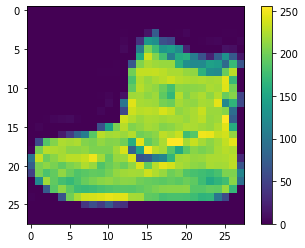

In [48]:
test_images.shape
len(test_labels)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

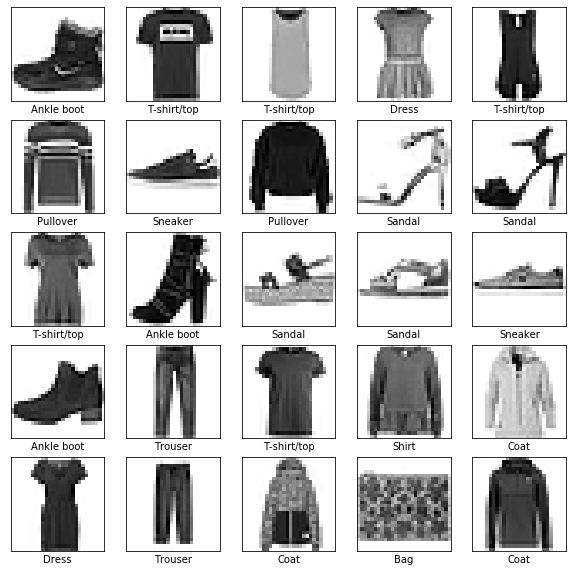

In [49]:
train_images = train_images / 255.0
test_images = test_images / 255.0
import matplotlib.pyplot as plt
%matplotlib inline

_=plt.figure(figsize=(10,10))
for i in range(25):
    _=plt.subplot(5,5,i+1)
    _=plt.xticks([])
    _=plt.yticks([])
    _=plt.grid('off')
    _=plt.imshow(train_images[i], cmap=plt.cm.binary)
    _=plt.xlabel(class_names[train_labels[i]])

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [51]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(train_images, train_labels, epochs=5)




Epoch 1/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.4958 - accuracy: 0.8259
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.3744 - accuracy: 0.8658
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.3362 - accuracy: 0.8785
Epoch 4/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.3122 - accuracy: 0.8855
Epoch 5/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.2938 - accuracy: 0.8923


In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 16us/step
Test accuracy: 0.876800000667572


In [54]:
predictions = model.predict(test_images)
predictions[0]
test_labels[0]

array([1.1458256e-05, 4.3650381e-09, 1.1408497e-06, 8.9307521e-09,
       5.4786875e-07, 5.9143938e-02, 7.9220954e-06, 6.3747332e-02,
       1.7468815e-03, 8.7534082e-01], dtype=float32)

9

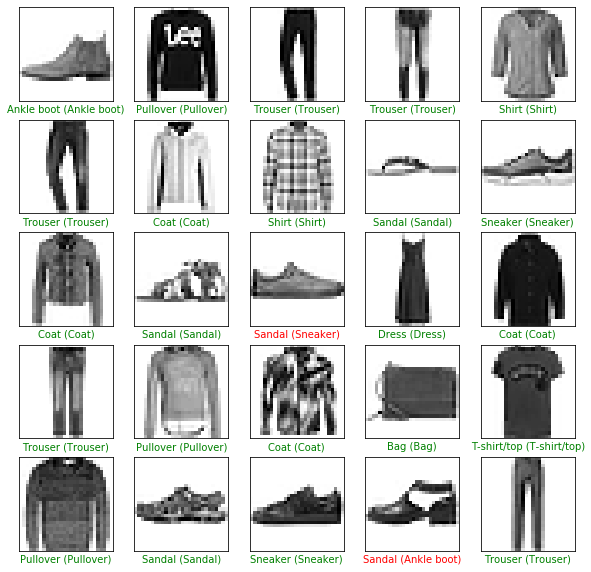

In [55]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
_=plt.figure(figsize=(10,10));
for i in range(25):
    _=plt.subplot(5,5,i+1);
    _=plt.xticks([]);
    _=plt.yticks([]);
    plt.grid('off');
    _=plt.imshow(test_images[i], cmap=plt.cm.binary);
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    _=plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]), color=color);

# CNNs for Hand-written digit recognition using Tensorflow

In [56]:
data_dir="MNIST_data/"
tf.reset_default_graph()

In [57]:
def deepnn(x):
  """deepnn builds the graph for a deep net for classifying digits.
  Args:
    x: an input tensor with the dimensions (N_examples, 784), where 784 is the
    number of pixels in a standard MNIST image.
  Returns:
    A tuple (y, keep_prob). y is a tensor of shape (N_examples, 10), with values
    equal to the logits of classifying the digit into one of 10 classes (the
    digits 0-9). keep_prob is a scalar placeholder for the probability of
    dropout.
  """
  # Reshape to use within a convolutional neural net.
  # Last dimension is for "features" - there is only one here, since images are
  # grayscale -- it would be 3 for an RGB image, 4 for RGBA, etc.
  x_image = tf.reshape(x, [-1, 28, 28, 1])

  # First convolutional layer - maps one grayscale image to 32 feature maps.
  W_conv1 = weight_variable([5, 5, 1, 32])
  b_conv1 = bias_variable([32])
  h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)

  # Pooling layer - downsamples by 2X.
  h_pool1 = max_pool_2x2(h_conv1)

  # Second convolutional layer -- maps 32 feature maps to 64.
  W_conv2 = weight_variable([5, 5, 32, 64])
  b_conv2 = bias_variable([64])
  h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)

  # Second pooling layer.
  h_pool2 = max_pool_2x2(h_conv2)

  # Fully connected layer 1 -- after 2 round of downsampling, our 28x28 image
  # is down to 7x7x64 feature maps -- maps this to 1024 features.
  W_fc1 = weight_variable([7 * 7 * 64, 1024])
  b_fc1 = bias_variable([1024])

  h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
  h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

  # Dropout - controls the complexity of the model, prevents co-adaptation of
  # features.
  keep_prob = tf.placeholder(tf.float32)
  h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

  # Map the 1024 features to 10 classes, one for each digit
  W_fc2 = weight_variable([1024, 10])
  b_fc2 = bias_variable([10])

  y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2
  return y_conv, keep_prob

In [58]:
def conv2d(x, W):
  """conv2d returns a 2d convolution layer with full stride."""
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [59]:
def max_pool_2x2(x):
  """max_pool_2x2 downsamples a feature map by 2X."""
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')


In [60]:
def weight_variable(shape):
  """weight_variable generates a weight variable of a given shape."""
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)
def bias_variable(shape):
  """bias_variable generates a bias variable of a given shape."""
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)


In [61]:
# Import data
mnist = input_data.read_data_sets(data_dir, one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])
# Build the graph for the deep net
y_conv, keep_prob = deepnn(x)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
      batch = mnist.train.next_batch(50)
      if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print('step %d, training accuracy %g' % (i, train_accuracy))
      train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
step 0, training accuracy 0.1
step 100, training accuracy 0.9
step 200, training accuracy 0.9
step 300, training accuracy 0.86
step 400, training accuracy 0.86
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.94
step 800, training accuracy 0.94
step 900, training accuracy 0.9
test accuracy 0.9641


In [62]:
#Count total number of parameters
total_parameters = 0
for variable in tf.trainable_variables():
    # shape is an array of tf.Dimension
    shape = variable.get_shape()
    print(variable.name, shape)
    print(len(shape))
    variable_parameters = 1
    for dim in shape:
        print(dim)
        variable_parameters *= dim.value
    print(variable_parameters)
    total_parameters += variable_parameters
print(total_parameters)

Variable:0 (5, 5, 1, 32)
4
5
5
1
32
800
Variable_1:0 (32,)
1
32
32
Variable_2:0 (5, 5, 32, 64)
4
5
5
32
64
51200
Variable_3:0 (64,)
1
64
64
Variable_4:0 (3136, 1024)
2
3136
1024
3211264
Variable_5:0 (1024,)
1
1024
1024
Variable_6:0 (1024, 10)
2
1024
10
10240
Variable_7:0 (10,)
1
10
10
3274634


# CNNs for Hand-written digit recognition using Keras

http://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/

In [63]:
from __future__ import print_function
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pylab as plt

In [64]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_x, img_y = 28, 28

In [65]:
# load the MNIST data set, which already splits into train and test sets for us
import os
(x_train, y_train), (x_test, y_test) = mnist.load_data(path=os.getcwd()+"/mnist.npz")

In [66]:
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [67]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [68]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [69]:
#Models in Keras can come in two forms: Sequential and via the Functional API.  
#For most deep learning networks that you build, the Sequential model is likely what you will use.  
#It allows you to easily stack sequential layers (and even recurrent layers) of the network in order from input to output.
#The functional API allows you to build more complicated architectures.

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [70]:
#Keras has a useful utility titled “callbacks” which can be utilised to track all sorts of variables during training.  
#You can also use it to create checkpoints which saves the model at different stages in training to help you 
#avoid work loss in case your poor overworked computer decides to crash.  
#It is passed to the .fit() function as observed below.
#We use it to track accuracy
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
history = AccuracyHistory()

In [71]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 439us/sample - loss: 0.1623 - acc: 0.9515 - val_loss: 0.0501 - val_acc: 0.9846
Epoch 2/10
60000/60000 [==============================] - 23s 386us/sample - loss: 0.0409 - acc: 0.9874 - val_loss: 0.0295 - val_acc: 0.9897
Epoch 3/10
60000/60000 [==============================] - 19s 313us/sample - loss: 0.0273 - acc: 0.9916 - val_loss: 0.0297 - val_acc: 0.9902
Epoch 4/10
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0207 - acc: 0.9932 - val_loss: 0.0312 - val_acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 18s 292us/sample - loss: 0.0166 - acc: 0.9945 - val_loss: 0.0264 - val_acc: 0.9922
Epoch 6/10
60000/60000 [==============================] - 18s 295us/sample - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0289 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 18s 301us/sample - loss: 0.0109 - acc: 0.9962 

Test loss: 0.034296705058137596
Test accuracy: 0.9916


Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Accuracy')

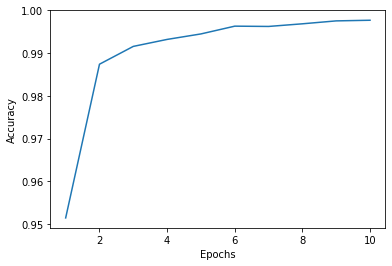

In [72]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Recurrent Neural Networks (RNNs)/ Long Short Term Memory (LSTMs) Networks

# Classify movie reviews: binary classification

In [73]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.14.0


In [74]:
#The IMDB dataset comes packaged with TensorFlow.
#It has already been preprocessed such that the reviews (sequences of words) have been 
#converted to sequences of integers, where each integer represents a specific word in a dictionary.

#The following code downloads the IMDB dataset to your machine (or uses a cached copy if you've already downloaded it)

#keras location is ~/.keras or c:\users\<username>\.keras

imdb = keras.datasets.imdb
import os
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000, path=os.getcwd()+"/imdb.npz")

# restore np.load for future normal usage
np.load = np_load_old

#The argument num_words=10000 keeps the top 10,000 most frequently occurring words in the training data. 
#The rare words are discarded to keep the size of the data manageable.

TypeError: load() got multiple values for keyword argument 'allow_pickle'

In [ ]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
train_labels[0:5]

In [ ]:
print(train_data[0])
len(train_data[0]), len(train_data[1])
#Each label is an integer value of either 0 or 1, where 0 is a negative review, and 1 is a positive review.

In [ ]:
#Convert the integers back to words
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [ ]:
decode_review(train_data[0])

In [ ]:
#Prepare the data
#One-hot-encode the arrays to convert them into vectors of 0s and 1s.
#For example, the sequence [3, 5] would become a 10,000-D vector that is
#all zeros except for indices 3 and 5, which are ones. Then, make this the
#first layer in our network—a Dense layer—that can handle floating point 
#vector data. This approach is memory intensive, though, requiring a 
#num_words * num_reviews size matrix.

#Alternatively, we can pad the arrays so they all have the same length,
#then create an integer tensor of shape num_examples * max_length. We can
#use an embedding layer capable of handling this shape as the first layer in our network.

#we will use the second approach.

train_data = keras.preprocessing.sequence.pad_sequences(train_data,
value=word_index["<PAD>"],padding='post',maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
value=word_index["<PAD>"],padding='post',maxlen=256)

In [ ]:
len(train_data[0]), len(train_data[1])
print(train_data[0])

In [ ]:
#Build the model
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

The layers are stacked sequentially to build the classifier:

- The first layer is an Embedding layer. This layer takes the integer-encoded vocabulary and looks up the embedding vector for each word-index. These vectors are learned as the model trains. The vectors add a dimension to the output array. The resulting dimensions are: (batch, sequence, embedding).
- Next, a GlobalAveragePooling1D layer returns a fixed-length output vector for each example by averaging over the sequence dimension. This allows the model can handle input of variable length, in the simplest way possible.
- This fixed-length output vector is piped through a fully-connected (Dense) layer with 16 hidden units.
- The last layer is densely connected with a single output node. Using the sigmoid activation function, this value is a float between 0 and 1, representing a probability, or confidence level.

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy',metrics=['accuracy'])
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=40,batch_size=512,validation_data=(x_val, y_val),verbose=1)

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
# Add a LSTM layer with 128 internal units.
model.add(keras.layers.LSTM(16))
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model.summary()
#There are three built-in RNN layers in Keras:
#tf.keras.layers.SimpleRNN
#tf.keras.layers.GRU
#tf.keras.layers.LSTM
#model.add(layers.Bidirectional(layers.LSTM(32)))

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=10,batch_size=512,validation_data=(x_val, y_val),verbose=1)

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print("Loss:", loss)
print("Accuracy:", accuracy)


# RNNs for Hand-written digit recognition using Tensorflow


In [ ]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib import rnn

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

In [ ]:
# Training Parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128
display_step = 200

# Network Parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_hidden = 128 # hidden layer num of features
num_classes = 10 # MNIST total classes (0-9 digits)

In [ ]:
# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [ ]:
def RNN(x, weights, biases):

    # Prepare data shape to match `rnn` function requirements
    # Current data input shape: (batch_size, timesteps, n_input)
    # Required shape: 'timesteps' tensors list of shape (batch_size, n_input)

    # Unstack to get a list of 'timesteps' tensors of shape (batch_size, n_input)
    x = tf.unstack(x, timesteps, 1)

    # Define a lstm cell with tensorflow
    lstm_cell = rnn.BasicLSTMCell(num_hidden, forget_bias=1.0)

    # Get lstm cell output
    outputs, states = rnn.static_rnn(lstm_cell, x, dtype=tf.float32)

    # Linear activation, using rnn inner loop last output
    return tf.matmul(outputs[-1], weights['out']) + biases['out']

logits = RNN(X, weights, biases)
prediction = tf.nn.softmax(logits)

In [ ]:
# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [ ]:
%%time
# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    for step in range(1, training_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Reshape data to get 28 seq of 28 elements
        batch_x = batch_x.reshape((batch_size, timesteps, num_input))
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= {:.4f}".format(loss) + ", Training Accuracy= {:.3f}".format(acc))

    print("Optimization Finished!")
    # Calculate accuracy for 128 mnist test images
    test_len = 128
    test_data = mnist.test.images[:test_len].reshape((-1, timesteps, num_input))
    test_label = mnist.test.labels[:test_len]
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: test_data, Y: test_label}))

# Tensorboard

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

import tensorflow as tf

# Set parameters
learning_rate = 0.01
training_iteration = 30
batch_size = 100
display_step = 2
##More stuff here: https://blog.jakuba.net/2017/05/30/tensorflow-visualization.html

In [ ]:
# TF graph input
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes

In [ ]:
# Create a model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

with tf.name_scope("Wx_b") as scope:
    # Construct a linear model
    model = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
    
# Add summary ops to collect data
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

In [ ]:
# More name scopes will clean up graph representation
with tf.name_scope("cost_function") as scope:
    # Minimize error using cross entropy
    # Cross entropy
    cost_function = -tf.reduce_sum(y*tf.log(model))
    # Create a summary to monitor the cost function
    tf.summary.scalar("cost_function", cost_function)

In [ ]:
with tf.name_scope("train") as scope:
    # Gradient descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [ ]:
# Initializing the variables
init = tf.global_variables_initializer()

# Merge all summaries into a single operator
merged_summary_op = tf.summary.merge_all()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    # Set the logs writer to the folder /tmp/tensorflow_logs
    summary_writer = tf.summary.FileWriter('logs2/', graph=sess.graph)

    # Training cycle
    for iteration in range(training_iteration):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute the average loss
            avg_cost += sess.run(cost_function, feed_dict={x: batch_xs, y: batch_ys})/total_batch
            # Write logs for each iteration
            summary_str = sess.run(merged_summary_op, feed_dict={x: batch_xs, y: batch_ys})
            summary_writer.add_summary(summary_str, iteration*total_batch + i)
        # Display logs per iteration step
        if iteration % display_step == 0:
            print("Iteration:", '%04d' % (iteration + 1), "cost=", "{:.9f}".format(avg_cost))

    print("Tuning completed!")
    # Test the model
    predictions = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(predictions, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

In [ ]:
#Launching TensorBoard
#To run TensorBoard, use the following command (alternatively python -m tensorboard.main)

#tensorboard --logdir=path/to/log-directory

#Once TensorBoard is running, navigate your web browser to localhost:6006 to view the TensorBoard.

# End of tutorial